In [6]:
import cv2
import glob
import os
import csv
import progressbar
from random import uniform
import numpy as np
from libs.Equirec2Perspec import Equirectangular as E2P
from libs.projections import rotateSP
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
def cropPano(img_path, sunpos):
    '''
    random crop perspective image at given theta value (320 x 240)
    elevation: [-10, 10], fov: [60, 100]
    '''
    e2p = E2P(img_path)
    elevation, fov, theta = round(uniform(-20, 20), 2), round(uniform(60, 100), 2), round(uniform(-180,180))
    img = e2p.GetPerspective(fov, theta, elevation, 240, 320)
    #new_sunpos = rotateSP(sunpos, theta, -elevation)
    return img, sunpos, elevation, fov, theta

In [40]:
def make360Datalist(fname):
    data_list = []
    with open(fname, newline='') as f:
        rows = csv.DictReader(f)
        for row in rows:
            panoID, elev = row['name'], row['elev']
            wsky1, wsky2, wsky3 = row['wsky1'], row['wsky2'], row['wsky3']
            wsun1, wsun2, wsun3 = row['wsun1'], row['wsun2'], row['wsun3']
            turb = row['t']
            kappa, beta = row['kappa'], row['beta']
            sunpos = np.array([float(row['sunpos_u']), float(row['sunpos_v'])])
            data_list.append({'panoID': panoID, 'sunpos': sunpos, 'wsky1': wsky1, 'wsky2': wsky2, 'wsky3': wsky3, 'wsun1': wsun1, 
                                          'wsun2': wsun2, 'wsun3': wsun3, 'turbidity': turb, 'kappa': kappa, 'beta': beta})
    return data_list

In [41]:
def main():
    print('Preparing data ..')
    pano_data = make360Datalist('./mydata/laval_label.csv')
    print('Start croping and constrcut final dataset list ...')
    #fname = './mydata/run_' + mode + '.csv'
    fname = './mydata/all_labels.csv'

    with open('./mydata/all_crop_labels.csv', 'w', newline = '') as f:
        #print("fname")
        # ,name,t,wsky(3채널 1 2 3),wsun(3채널1 2 3),sunpos_u,sunpos_v, kappa, beta

        fieldnames = ['filepath', 'u', 'v', 'wsky1', 'wsky2', 'wsky3', 'wsun1', 'wsun2', 'wsun3', 'kappa', 'beta', 'turbidity', 'elevation', 'fov']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        bar = progressbar.ProgressBar()
        #print(len(pano_data))
        for i in bar(range(len(pano_data))):
            
            img_path = pano_data[i]['panoID'] + '.jpg'
#            print('./6.2/'+img_path)
            #print(pano_data[0])
            if os.path.isfile('./6.2/'+img_path):
#                print("!!!")
                turbidity, kappa, beta = pano_data[i]['turbidity'], pano_data[i]['kappa'], pano_data[i]['beta']
                wsky1, wsky2, wsky3 = pano_data[i]['wsky1'], pano_data[i]['wsky2'], pano_data[i]['wsky3']
                wsun1, wsun2, wsun3 = pano_data[i]['wsun1'], pano_data[i]['wsun2'], pano_data[i]['wsun3']
                #### Two cropping/saving processes: front and back view ####
                for j in range(7):
                    crop, sp, ele, fov, theta = cropPano('./6.2/'+img_path, pano_data[i]['sunpos'])
                    #crop = crop[...,::-1].copy()
                    save_name = './pano'  + '/' + pano_data[i]['panoID'] + '_' + names[j] + '.jpg'
                    cv2.imwrite(save_name, crop)
                    writer.writerow({'filepath': save_name, 'u': sp[0], 'v': sp[1], 'turbidity': turbidity, 'kappa': kappa, 'beta': beta, 
                                                'wsun1': wsun1, 'wsun2': wsun2, 'wsun3': wsun3, 'wsky1': wsky1, 'wsky2': wsky2, 'wsky3':wsky3, 'elevation': ele, 'fov': fov})
    print('Done!')


In [42]:
names = ['a','b','c','d','e','f','g']

In [43]:
main()

  0% (0 of 205) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Preparing data ..
Start croping and constrcut final dataset list ...


100% (205 of 205) |######################| Elapsed Time: 0:12:15 Time:  0:12:15


Done!


In [22]:
pano_data = make360Datalist('./mydata/laval_label.csv')
len(pano_data)

205

In [36]:
img_path = './real/001.jpg'

In [37]:
sunpos = [0.73618, 0.16609]

In [38]:
crop1, sp1, ele1, fov1 = cropPano(img_path, sunpos)
crop2, sp2, ele2, fov2 = cropPano(img_path, sunpos)

ValueError: too many values to unpack (expected 4)

In [7]:
# brg to rgb
crop1 = crop1[...,::-1].copy()
crop2 = crop2[...,::-1].copy()

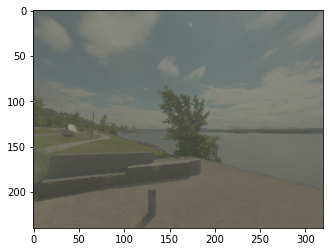

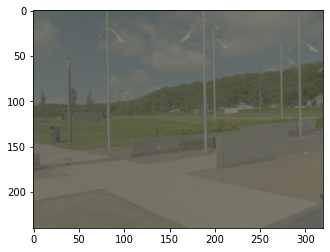

In [8]:
plt.imshow(crop1)
plt.show()

plt.imshow(crop2)
plt.show()